In [ ]:
!pip install kaggle


In [ ]:
%mkdir /usr/local/lib/python3.10/dist-packages/.kaggle/
%cp kaggle.json /usr/local/lib/python3.10/dist-packages/.kaggle/

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
uber_data=pd.read_csv('/content/sample_data/My Uber Drives - 2016.csv')

In [ ]:
uber_data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
print(uber_data.isnull().sum())
uber_data=uber_data.dropna()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64


In [ ]:
uber_data.columns = [col.strip("*") for col in uber_data.columns]

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [ ]:
#make string as datetime to identify individual components easily
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M")
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format="%m/%d/%Y %H:%M")

uber_data['HOUR']= [x.hour for x in uber_data['START_DATE']]
uber_data['DAY']= [x.day for x in uber_data['START_DATE']]
uber_data['MONTH']= [x.month for x in uber_data['START_DATE']]
uber_data['WEEKDAY']= [calendar.day_name[x.dayofweek] for x in uber_data['START_DATE']]
uber_data['DAY_OF_WEEK']= [x.dayofweek for x in uber_data['START_DATE']]

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


<Axes: xlabel='CATEGORY', ylabel='count'>

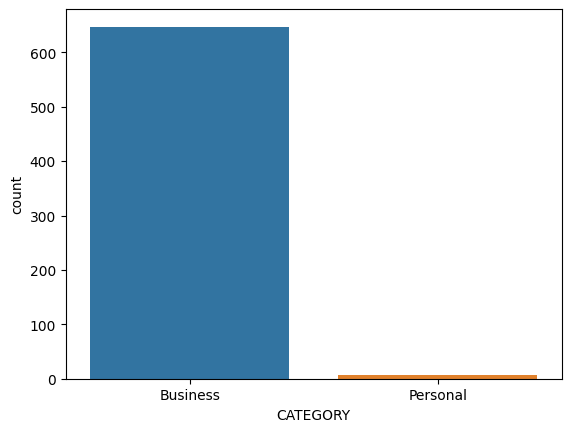

In [ ]:
sns.countplot(x='CATEGORY',data=uber_data)

<Axes: xlabel='count', ylabel='PURPOSE'>

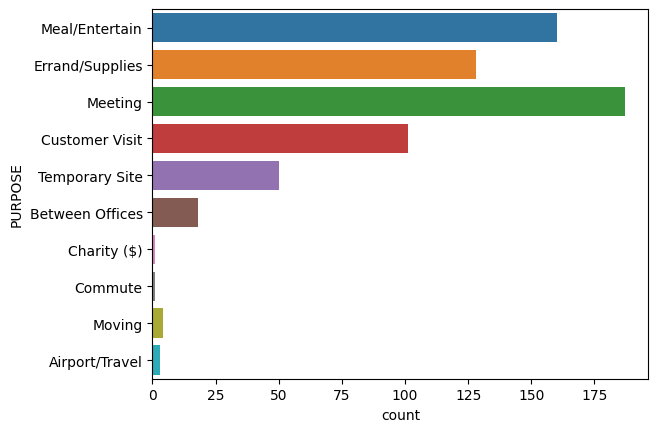

In [ ]:
sns.countplot(y='PURPOSE',data=uber_data)

<Axes: ylabel='Frequency'>

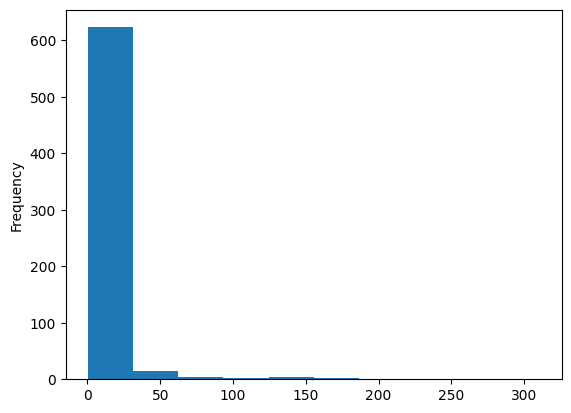

In [ ]:
uber_data['MILES'].plot.hist()

Text(0.5, 1.0, 'Number of trips Vs hours')

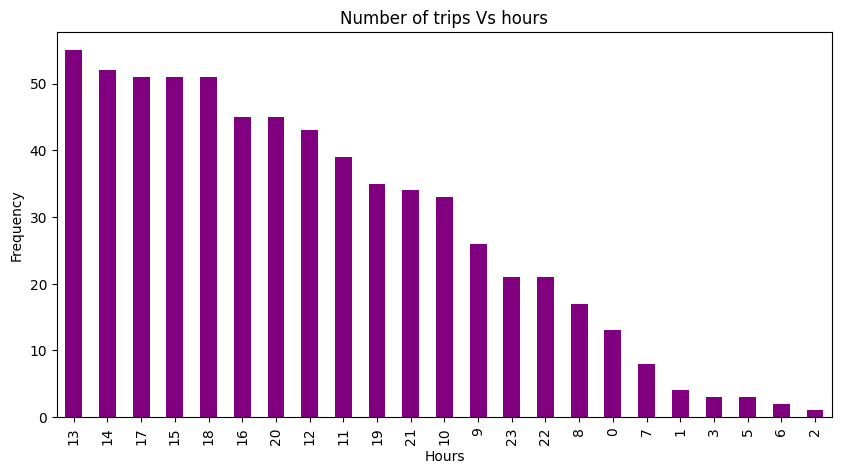

In [ ]:
hours = uber_data['HOUR'].value_counts()
hours.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')


Text(0.5, 1.0, 'Number of trips Vs days')

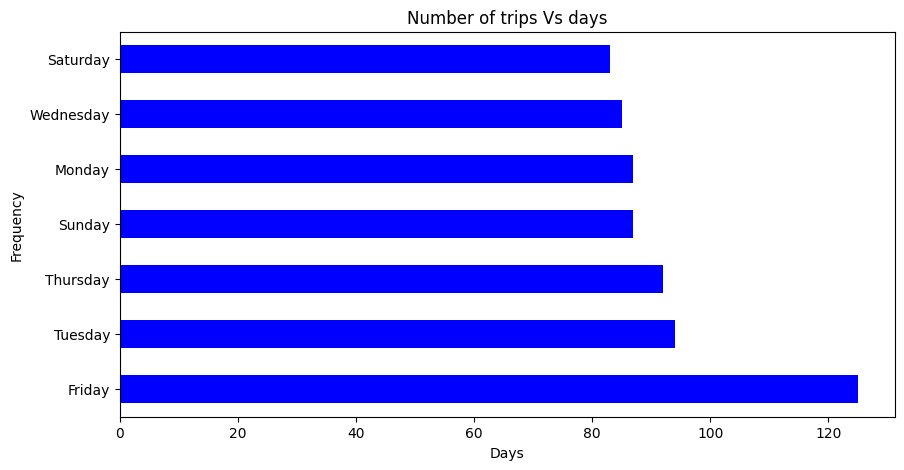

In [ ]:
days = uber_data['WEEKDAY'].value_counts()
days.plot(kind='barh',color='blue',figsize=(10,5))
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days')
#most trips are on Friday

Text(0.5, 1.0, 'Number of trips Vs months')

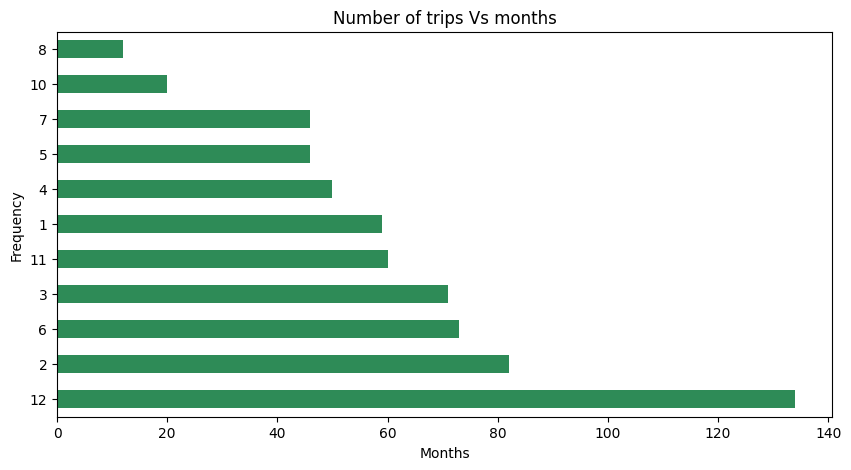

In [ ]:
months = uber_data['MONTH'].value_counts()
months.plot(kind='barh',color='seagreen',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')
#most trips are in December

Text(0.5, 1.0, 'Frequency of trips per december day')

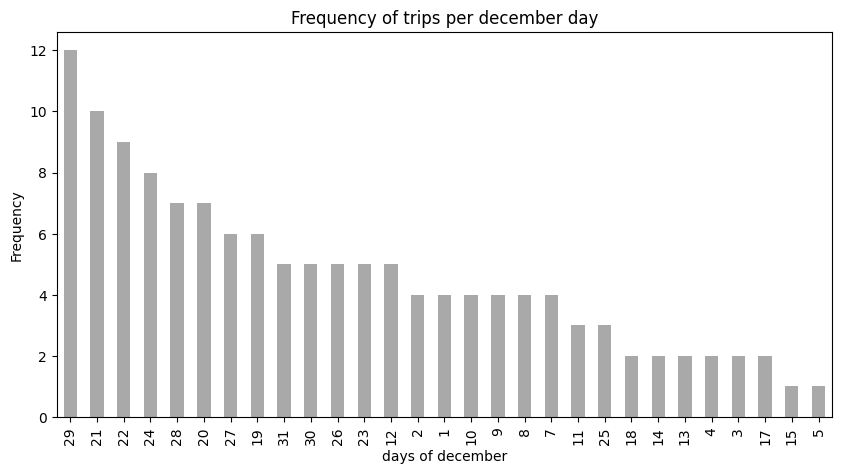

In [ ]:
months = uber_data['DAY'][uber_data['MONTH']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel('Frequency')
plt.title('Frequency of trips per december day')
#most trips in December are in the holiday season

In [4]:
data=pd.read_csv('/content/sample_data/rideshare_kaggle.csv')

In [5]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [6]:
extra_cols =  ['apparentTemperature', 'precipIntensity', 'humidity', 'windSpeed',
              'windGust', 'apparentTemperatureHigh', 'dewPoint','precipIntensityMax',
              'apparentTemperatureMax', 'cloudCover', 'moonPhase',
              'windGustTime', 'visibility', 'temperatureHighTime',
              'temperatureLowTime', 'apparentTemperatureHighTime',
              'apparentTemperatureLow', 'apparentTemperatureLowTime',
              'temperatureMinTime', 'temperatureMaxTime', 'apparentTemperatureMin',
              'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
              'windBearing', 'uvIndex', 'visibility.1', 'ozone',
              'sunriseTime', 'sunsetTime', 'uvIndexTime']

data=data.drop(extra_cols, axis=1)

In [ ]:
print(data.isnull().sum())
data=data.dropna()

id                       0
timestamp                0
hour                     0
day                      0
month                    0
datetime                 0
timezone                 0
source                   0
destination              0
cab_type                 0
product_id               0
name                     0
price                55095
distance                 0
surge_multiplier         0
latitude                 0
longitude                0
temperature              0
short_summary            0
long_summary             0
precipProbability        0
temperatureHigh          0
temperatureLow           0
icon                     0
pressure                 0
temperatureMin           0
temperatureMax           0
dtype: int64


### Performing EDA on Boston rides data set


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Text(0.5, 1.0, 'Number of trips Vs hours')

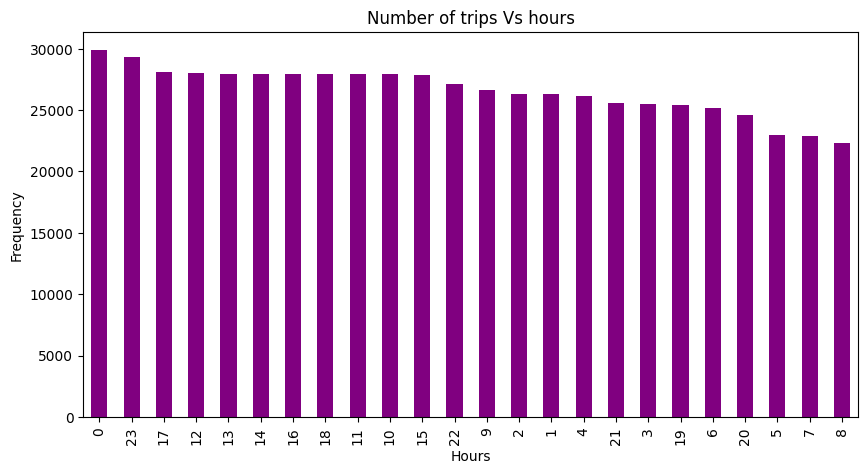

In [ ]:
hours = data['hour'].value_counts()
hours.plot(kind='bar',color='purple',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')
#most trips taken in evening


In [ ]:
day_week = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(data['datetime'], format="%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

Text(0.5, 1.0, 'Number of trips Vs days')

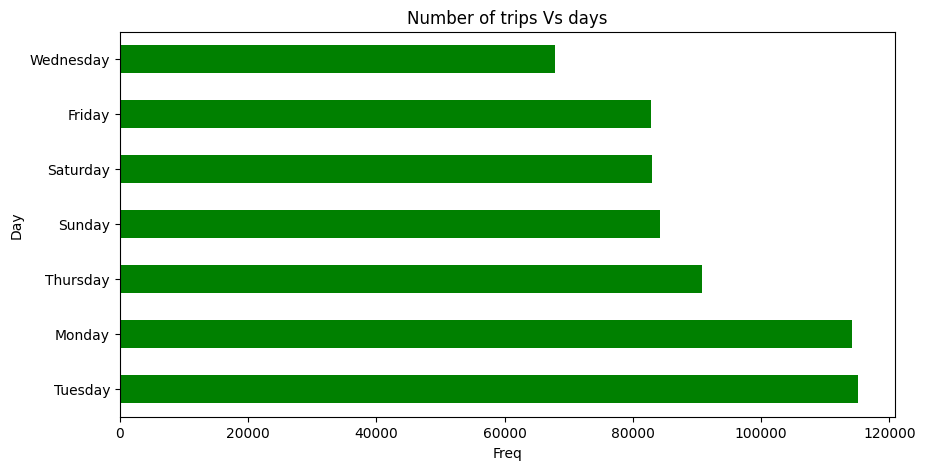

In [ ]:
days = day_week.value_counts()
days.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Freq')
plt.ylabel('Day')
plt.title('Number of trips Vs days')

Text(0.5, 1.0, 'Number of trips Vs months')

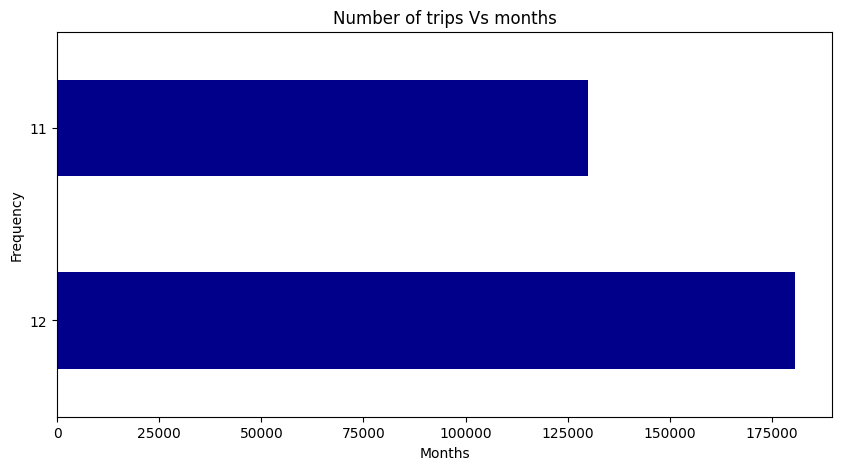

In [7]:
months = data['month'].value_counts()
months.plot(kind='barh',color='darkblue',figsize=(10,5))
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title('Number of trips Vs months')
#most trips are in December

Text(0.5, 1.0, 'Number of trips Vs days of december')

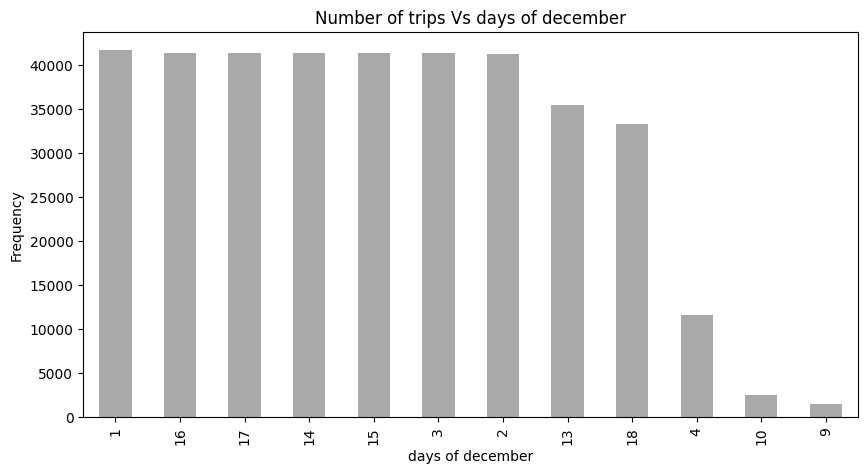

In [ ]:
months = data['day'][data['month']==12].value_counts()
months.plot(kind='bar',color='darkgray',figsize=(10,5))
plt.xlabel('days of december')
plt.ylabel('Frequency')
plt.title('Number of trips Vs days of december')
#most trips in December are in the holiday season

Text(0.5, 1.0, 'Pickup point Vs Frequency')

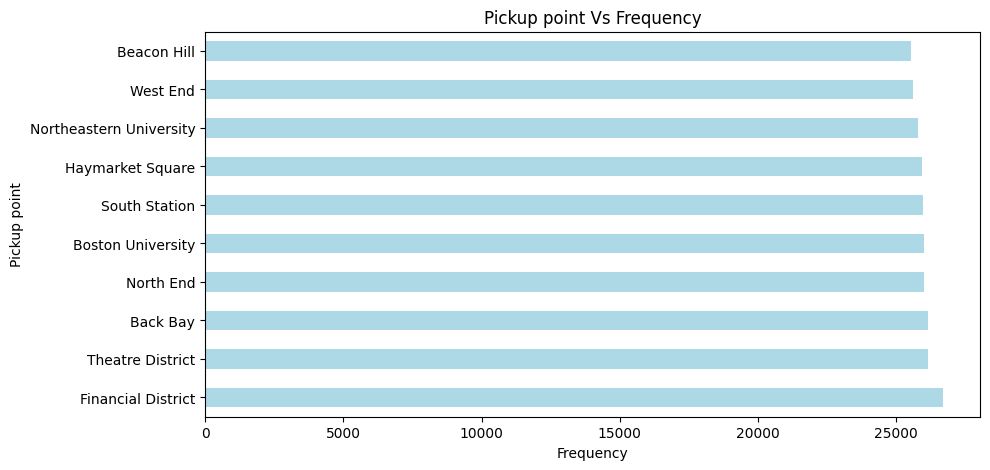

In [8]:
source = data['source'].value_counts().nlargest(10)
source.plot(kind='barh',color='lightblue',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Pickup point')
plt.title('Pickup point Vs Frequency')

Text(0.5, 1.0, 'End point Vs Frequency')

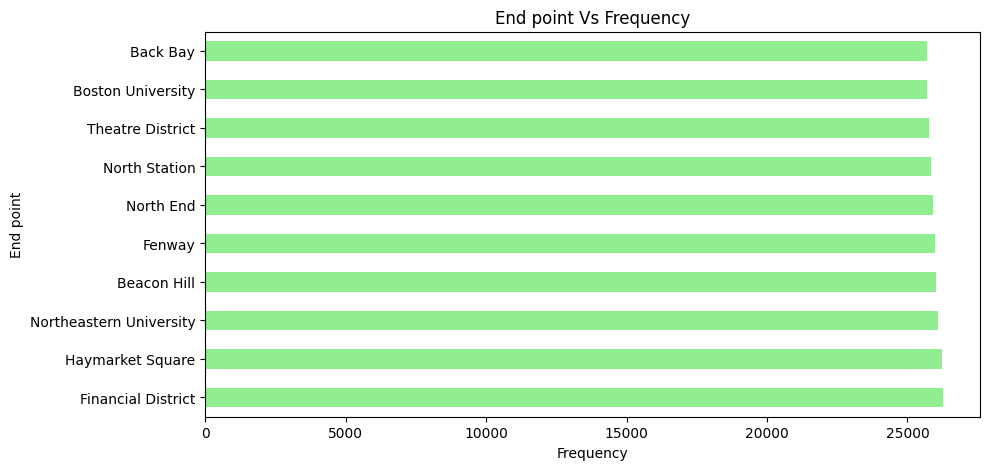

In [9]:
months = data['destination'].value_counts().nlargest(10)
months.plot(kind='barh',color='lightgreen',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('End point')
plt.title('End point Vs Frequency')

Text(0.5, 1.0, 'Trips Vs Frequency')

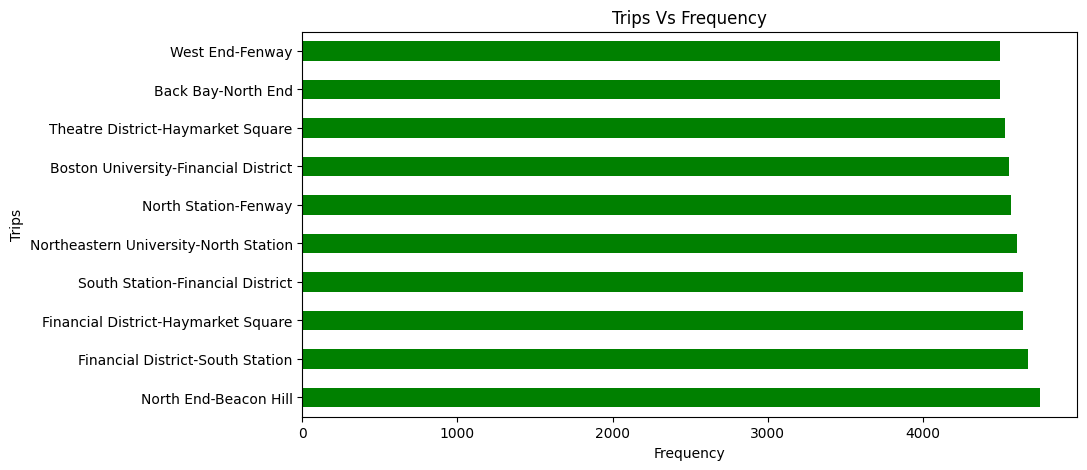

In [10]:
trips = data['source']+'-'+data['destination']
trips = trips.value_counts().nlargest(10)
trips.plot(kind='barh',color='green',figsize=(10,5))
plt.xlabel('Frequency')
plt.ylabel('Trips')
plt.title('Trips Vs Frequency')

<Axes: xlabel='count', ylabel='name'>

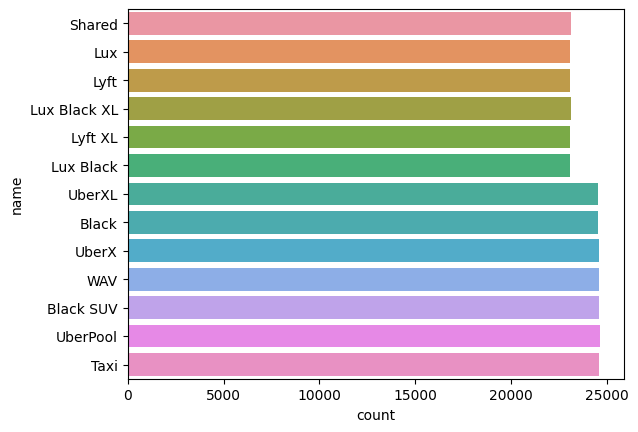

In [11]:
sns.countplot(y='name',data=data)